In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import collections
import ast

In [10]:
import os
from collections import Counter
import matplotlib.pyplot as plt
import nltk
import numpy as np
import pandas as pd
import seaborn as sns
import spacy
from gensim.models import Word2Vec
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    f1_score,
    multilabel_confusion_matrix,
    precision_score,
    recall_score,
    roc_auc_score,
)
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import normalize
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier

In [11]:
df = pd.read_csv('dataset/train.csv')
df_test = pd.read_csv('dataset/test_labels.csv')
df_testcomments = pd.read_csv('dataset/test.csv')

In [12]:
# obtain class labels of the dataset
class_labels = list(df.columns[2:])
class_labels

# remove rows with -1 from df_test as it is not used for scoring
print(f'Before removing -1: {df_test.shape}')
for class_label in class_labels:
    df_test = df_test[df_test[class_label] != -1]
print(f'After removing -1: {df_test.shape}')

# merge df_test and df_testcomments on id
df_test = pd.merge(df_test, df_testcomments, on='id', how='left')
# rearraange columns to be the same as df
df_test = df_test[['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']]

Before removing -1: (153164, 7)
After removing -1: (63978, 7)


In [13]:
# Visualizing the class distribution of the 'label' column
column_labels = df.columns.tolist()[2:]
label_counts = df[column_labels].sum().sort_values()

In [14]:
# Get label for train and test data
y = df[class_labels]
y_test = df_test[class_labels]

In [15]:
df_combined = pd.read_csv('/Users/ved/Desktop/Sem 7/DL Project/Tokenized_Data/df_combined.csv')
df_combined_test = pd.read_csv('/Users/ved/Desktop/Sem 7/DL Project/Tokenized_Data/df_combined_test.csv')

In [16]:
df_combined.head()

,comment,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,"['explanation', 'edit', 'username', 'hardcore'...",0,0,0,0,0,0
1,"['aww', 'match', 'background', 'colour', 'I', ...",0,0,0,0,0,0
2,"['hey', 'man', 'I', 'try', 'edit', 'war', 'guy...",0,0,0,0,0,0
3,"['real', 'suggestion', 'improvement', 'wonder'...",0,0,0,0,0,0
4,"['sir', 'hero', 'chance', 'remember', 'page']",0,0,0,0,0,0


In [17]:
for i in range(len(df_combined['comment'])):
    df_combined["comment"][i] = ast.literal_eval(df_combined["comment"][i])

/var/folders/1m/v10vjxqd235fn30s91s6nnx40000gn/T/ipykernel_10554/719557163.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_combined["comment"][i] = ast.literal_eval(df_combined["comment"][i])


In [18]:
df_combined.head()

,comment,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,"[explanation, edit, username, hardcore, metall...",0,0,0,0,0,0
1,"[aww, match, background, colour, I, seemingly,...",0,0,0,0,0,0
2,"[hey, man, I, try, edit, war, guy, constantly,...",0,0,0,0,0,0
3,"[real, suggestion, improvement, wonder, sectio...",0,0,0,0,0,0
4,"[sir, hero, chance, remember, page]",0,0,0,0,0,0


In [19]:
df_combined_test.head()

,comment,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,"['thank', 'understanding', 'I', 'think', 'high...",0,0,0,0,0,0
1,"['dear', 'god', 'site', 'horrible']",0,0,0,0,0,0
2,"['somebody', 'invariably', 'try', 'add', 'Reli...",0,0,0,0,0,0
3,"['right', 'type', 'type', 'institution', 'need...",0,0,0,0,0,0
4,"['add', 'new', 'product', 'list', 'sure', 'rel...",0,0,0,0,0,0


In [20]:
for i in range(len(df_combined_test['comment'])):
    df_combined_test["comment"][i] = ast.literal_eval(df_combined_test["comment"][i])

/var/folders/1m/v10vjxqd235fn30s91s6nnx40000gn/T/ipykernel_10554/4269561832.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_combined_test["comment"][i] = ast.literal_eval(df_combined_test["comment"][i])


In [21]:
def graph_multilabel(df1,
                     title='Number of comments having multiple labels',
                     offset=500):
    """
    Plot number of comments having multiple labels

    :param df1: dataframe
    :param title: string
    :param offset: int
    :return: series
    """

    # sum of all labels
    rowSums = df1.iloc[:, 2:].sum(axis=1)
    # count of comments having multiple labels
    multiLabel_counts = rowSums.value_counts()
    # remove count of comments having zero labels
    multiLabel_counts = multiLabel_counts[1:]
    # sort the index
    multiLabel_counts = multiLabel_counts.sort_index(ascending=True)

    sns.barplot(x=multiLabel_counts.index, y=multiLabel_counts.values)
    for i, v in enumerate(multiLabel_counts.values):
        plt.text(i - 0.2, v + offset, str(v), color='black', fontweight='bold')
    plt.title(title)
    plt.ylabel('Number of comments', fontsize=12)
    plt.xlabel('Number of labels', fontsize=12)
    plt.show()
    return multiLabel_counts


def get_class_info(df, df_combine, class_labels):
    """
    Get number of sentences and tokens for each class

    :param df: dataframe
    :param df_combine: dataframe
    :param class_labels: list of strings
    :return: dictionary
    """
    class_info = {}
    for class_label in class_labels:
        data = df[df[class_label] == 1]
        num_sentences = data.shape[0]
        num_tokens = df_combine[df_combine[class_label]
                                == 1]['comment'].apply(len).sum()
        class_info[class_label] = {
            'num_sentences': num_sentences, 'num_tokens': num_tokens}
    return class_info


def plot_sent(class_info,
              title='Number of sentences per class in training data',
              label_offset=500):
    """
    Plot number of sentences per class

    :param class_info: dictionary
    :param title: string
    :param label_offset: int
    :return: None
    """
    counts = [d['num_sentences'] for d in class_info.values()]
    plt.figure(figsize=(10, 8))
    sns.barplot(x=class_labels, y=counts)
    plt.title(title)
    for i, count in enumerate(counts):
        plt.text(i, count + label_offset, count, ha='center', va='top')
    plt.show()


def plot_tokens(class_info,
                title='Number of tokens per class in training data',
                label_offset=500):
    """
    Plot number of tokens per class

    :param class_info: dictionary
    :param title: string
    :param label_offset: int
    :return: None
    """
    counts = [d['num_tokens'] for d in class_info.values()]
    plt.figure(figsize=(10, 8))
    sns.barplot(x=class_labels, y=counts)
    plt.title(title)
    for i, count in enumerate(counts):
        plt.text(i, count + label_offset, count, ha='center', va='top')
    plt.show()


def plot_common_words(counts, title):
    """
    Plot most common words

    :param counts: list of tuples
    :param title: string
    :return: None
    """
    labels = [word for word, _ in counts]
    freqs = [count for _, count in counts]
    plt.figure(figsize=(10, 5))
    plt.bar(labels, freqs, color='blue')
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.title(title)
    plt.show()

In [22]:
# count of words per label
category_counts = df.iloc[:, 2:].sum()
print(category_counts)
print('\n')
category_counts_test = df_test.iloc[:, 2:].sum()
print(category_counts_test)

toxic            15294
severe_toxic      1595
obscene           8449
threat             478
insult            7877
identity_hate     1405
dtype: int64


toxic            6090
severe_toxic      367
obscene          3691
threat            211
insult           3427
identity_hate     712
dtype: int64


/var/folders/1m/v10vjxqd235fn30s91s6nnx40000gn/T/ipykernel_10554/2404057829.py:18: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  multiLabel_counts = multiLabel_counts[1:]


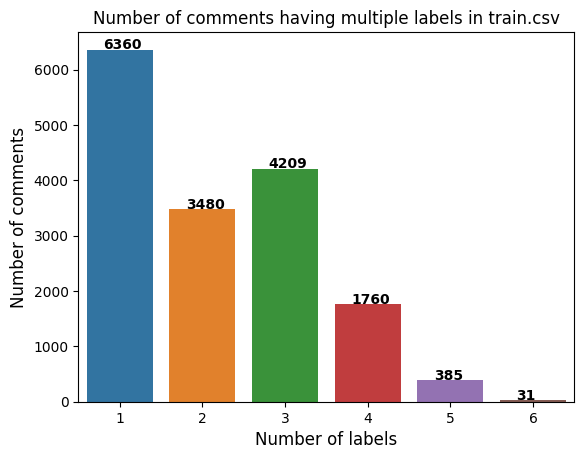

/var/folders/1m/v10vjxqd235fn30s91s6nnx40000gn/T/ipykernel_10554/2404057829.py:18: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  multiLabel_counts = multiLabel_counts[1:]


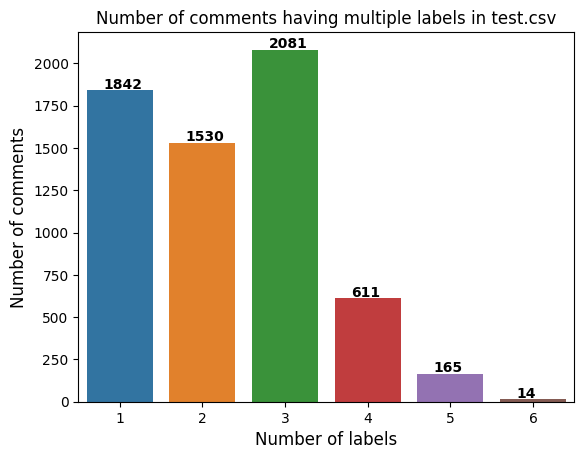

1    1842
2    1530
3    2081
4     611
5     165
6      14
dtype: int64

In [23]:
# plot number of comments having multiple labels
label_count = graph_multilabel(df,
                               title='Number of comments having multiple labels in train.csv',
                               offset=10)
graph_multilabel(
    df_test, title='Number of comments having multiple labels in test.csv', offset=10)

In [24]:
# get number of sentences and tokens for each class
train_info = get_class_info(df, df_combined, class_labels)
train_info

{'toxic': {'num_sentences': 15294, 'num_tokens': 386611},
 'severe_toxic': {'num_sentences': 1595, 'num_tokens': 72476},
 'obscene': {'num_sentences': 8449, 'num_tokens': 214419},
 'threat': {'num_sentences': 478, 'num_tokens': 12904},
 'insult': {'num_sentences': 7877, 'num_tokens': 192976},
 'identity_hate': {'num_sentences': 1405, 'num_tokens': 41801}}

In [25]:
test_info = get_class_info(df_test, df_combined_test, class_labels)
test_info

{'toxic': {'num_sentences': 6090, 'num_tokens': 136767},
 'severe_toxic': {'num_sentences': 367, 'num_tokens': 27396},
 'obscene': {'num_sentences': 3691, 'num_tokens': 93682},
 'threat': {'num_sentences': 211, 'num_tokens': 5962},
 'insult': {'num_sentences': 3427, 'num_tokens': 84454},
 'identity_hate': {'num_sentences': 712, 'num_tokens': 23064}}

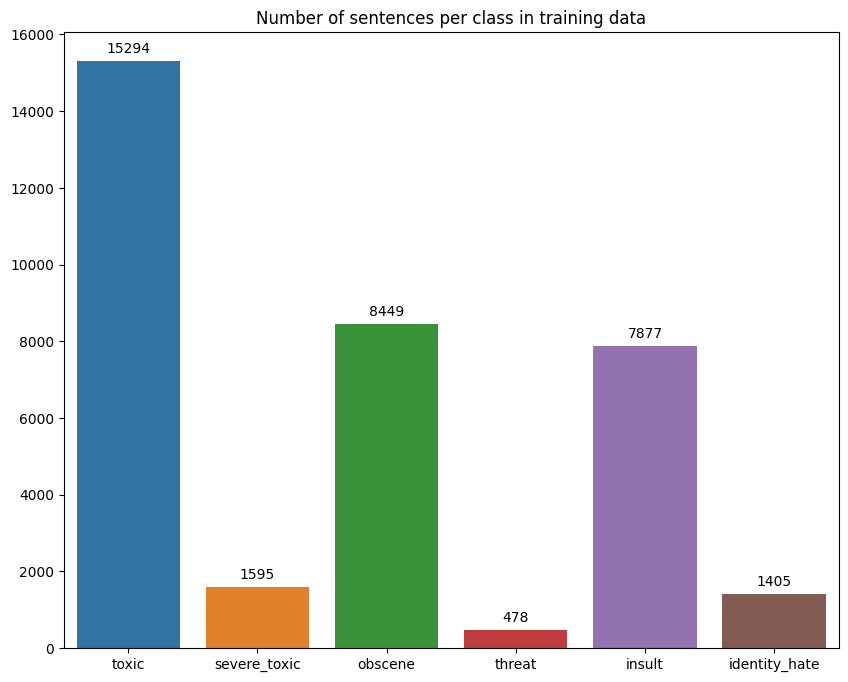

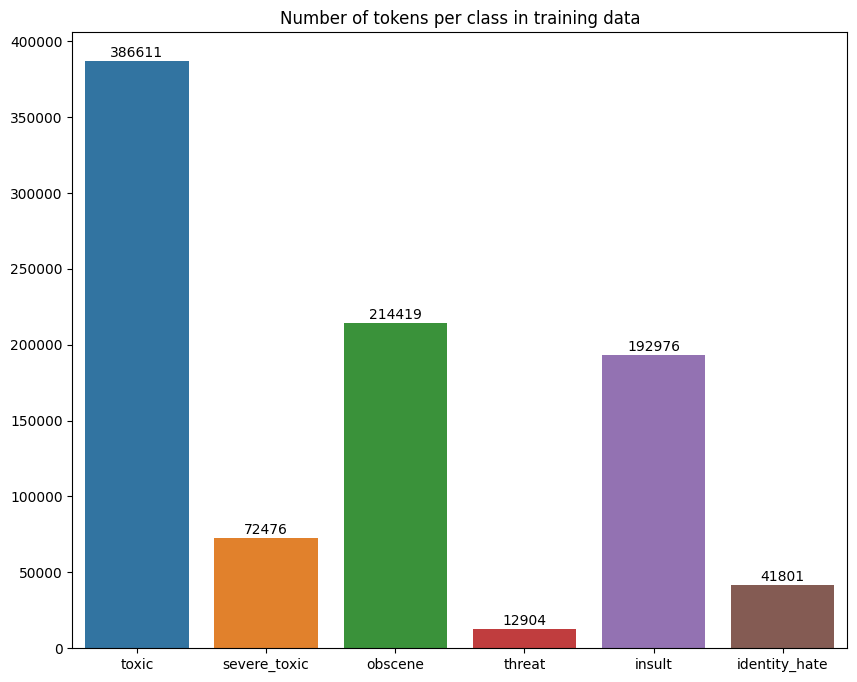

In [26]:
# Visualize the distributtion of the dataset
plot_sent(train_info, title='Number of sentences per class in training data')

# Visualize the distribution of number of tokens per class
plot_tokens(train_info, title='Number of tokens per class in training data', label_offset=10000)

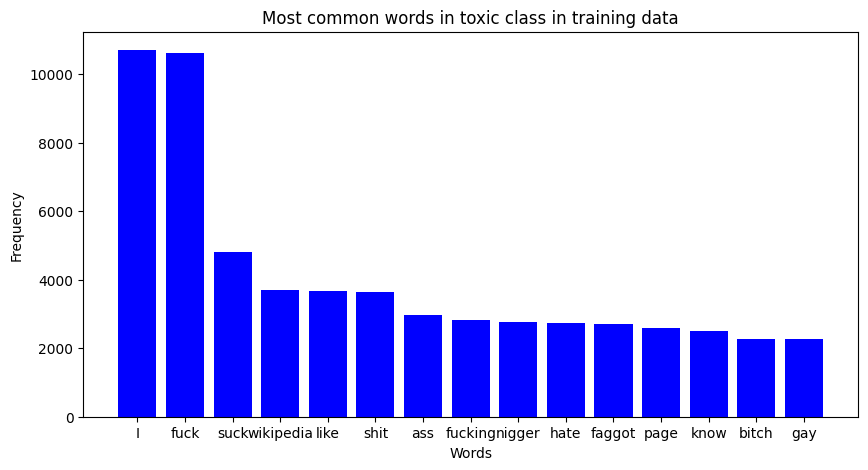

Most common words in toxic class: [('I', 10697), ('fuck', 10624), ('suck', 4801), ('wikipedia', 3688), ('like', 3657), ('shit', 3652), ('ass', 2967), ('fucking', 2822), ('nigger', 2768), ('hate', 2743), ('faggot', 2693), ('page', 2591), ('know', 2492), ('bitch', 2278), ('gay', 2268)]


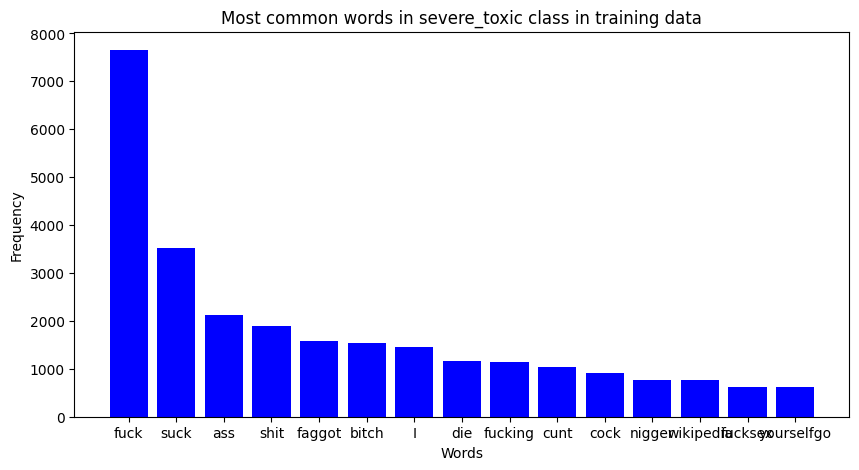

Most common words in severe_toxic class: [('fuck', 7654), ('suck', 3519), ('ass', 2119), ('shit', 1889), ('faggot', 1576), ('bitch', 1544), ('I', 1463), ('die', 1165), ('fucking', 1149), ('cunt', 1038), ('cock', 905), ('nigger', 776), ('wikipedia', 774), ('fucksex', 624), ('yourselfgo', 621)]


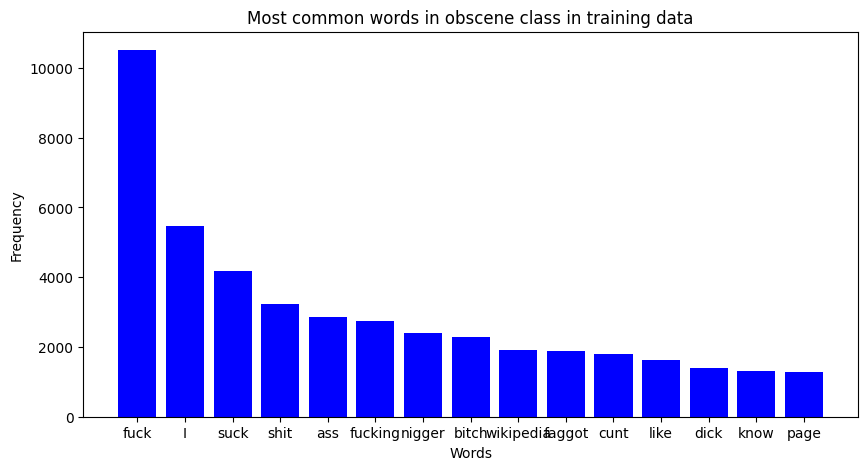

Most common words in obscene class: [('fuck', 10510), ('I', 5470), ('suck', 4191), ('shit', 3234), ('ass', 2869), ('fucking', 2738), ('nigger', 2409), ('bitch', 2281), ('wikipedia', 1912), ('faggot', 1893), ('cunt', 1784), ('like', 1634), ('dick', 1401), ('know', 1300), ('page', 1294)]


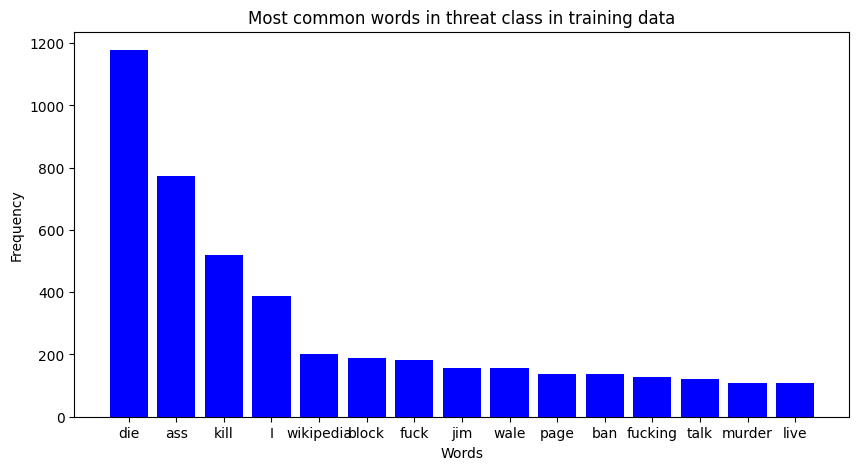

Most common words in threat class: [('die', 1178), ('ass', 772), ('kill', 521), ('I', 388), ('wikipedia', 200), ('block', 188), ('fuck', 183), ('jim', 158), ('wale', 157), ('page', 138), ('ban', 136), ('fucking', 129), ('talk', 121), ('murder', 109), ('live', 107)]


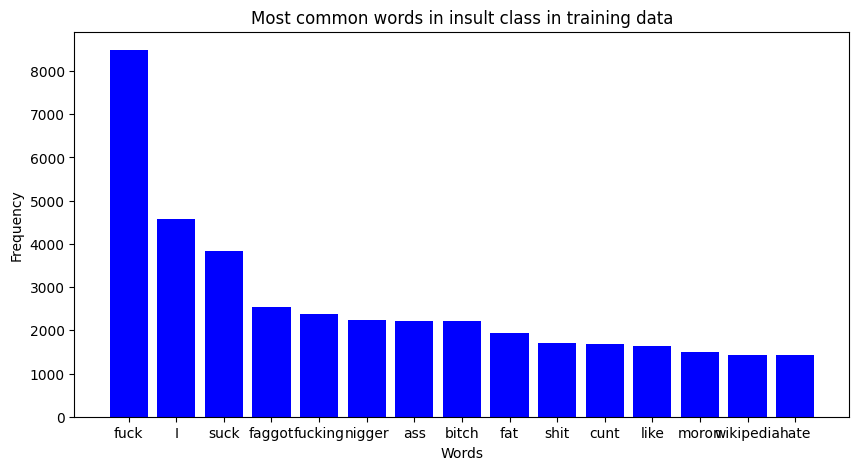

Most common words in insult class: [('fuck', 8486), ('I', 4566), ('suck', 3834), ('faggot', 2532), ('fucking', 2378), ('nigger', 2236), ('ass', 2226), ('bitch', 2209), ('fat', 1928), ('shit', 1709), ('cunt', 1689), ('like', 1644), ('moron', 1507), ('wikipedia', 1433), ('hate', 1430)]


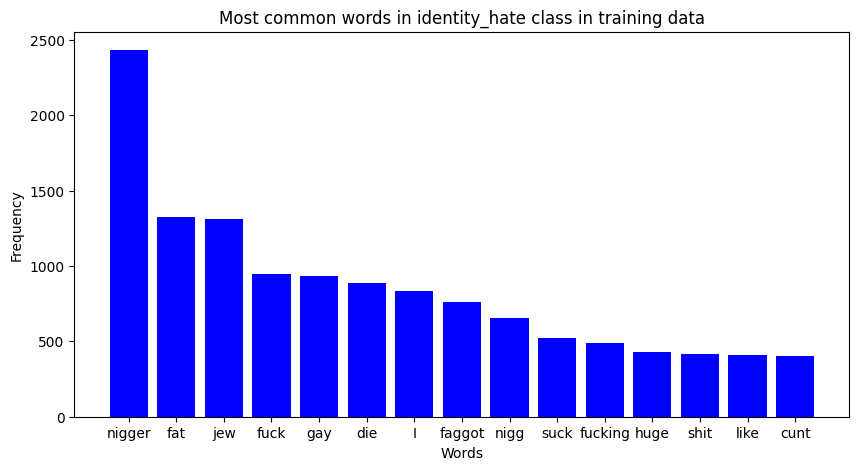

Most common words in identity_hate class: [('nigger', 2433), ('fat', 1323), ('jew', 1314), ('fuck', 946), ('gay', 936), ('die', 885), ('I', 834), ('faggot', 761), ('nigg', 656), ('suck', 520), ('fucking', 491), ('huge', 430), ('shit', 413), ('like', 409), ('cunt', 403)]


In [27]:
# Visualize the distribution of the 15 most common words for each class
for label in class_labels:
    words = []
    for comment in df_combined[df_combined[label] == 1]['comment']:
        words.extend(comment)
    most_common_words = Counter(words).most_common(15)
    plot_common_words(most_common_words, f'Most common words in {label} class in training data')
    print(f'Most common words in {label} class: {most_common_words}')